In [1]:
import pickle

In [2]:
from preprocess.data_tokenization import DataTokenizationTask
from preprocess.questions_label_extraction import QuestionsLabelExtractionTask

In [3]:
import utils.luigi_wrapper as luigi
from utils.utils import *

In [4]:
arr = QuestionsLabelExtractionTask.get_outputs()
arr

,agent,album,alia,alma_mat,alt,artist,associated_act,award,b-side,background,...,rel,releas,resid,signatur,spous,studio,type,websit,writer,years_act
page,,,,,,,,,,,,,,,,,,,,,
Sean Tyla,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Michael Sheridan (musician),0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Mizuki Fukumura,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Mitsuru Igarashi,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Paul Masvidal,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Derek Bloom,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Maho Matsunaga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Barbara Morrison,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
from sklearn.multiclass import OneVsRestClassifier

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = OneVsRestClassifier(LogisticRegression())

In [13]:
with open('cache/raw_data/full_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [14]:
from matplotlib import pyplot as plt

In [15]:
import numpy as np

In [16]:
df.head()

,text,infobox
page,,
Sean Tyla,"Sean Tyla (born John Michael Kenneth Tyler, 3 ...","{'name': 'Sean Tyla', 'background': 'solo_sing..."
Michael Sheridan (musician),Michael Sheridan is an Australian guitarist. H...,"{'name': 'Michael Sheridan', 'background': 'no..."
Mizuki Fukumura,"Mizuki Fukumura (譜久村 聖, Fukumura Mizuki, born ...","{'name': 'Mizuki Fukumura', 'image': '161006 A..."
Mitsuru Igarashi,"Mitsuru Igarashi (五十嵐 充, Igarashi Mitsuru, bor...","{'name': 'Mitsuru Igarashi', 'background': 'no..."
Paul Masvidal,"Paul Albert Masvidal (born January 20, 1971) i...","{'name': 'Paul Masvidal', 'image': 'Paul Masvi..."


In [17]:
df['label'] = df.apply(lambda row: list(row.infobox.keys()), axis=1)

In [18]:
df.head()

,text,infobox,label
page,,,
Sean Tyla,"Sean Tyla (born John Michael Kenneth Tyler, 3 ...","{'name': 'Sean Tyla', 'background': 'solo_sing...","[name, background, birth_name, birth_date, bir..."
Michael Sheridan (musician),Michael Sheridan is an Australian guitarist. H...,"{'name': 'Michael Sheridan', 'background': 'no...","[name, background, birth_place, instrument, ye..."
Mizuki Fukumura,"Mizuki Fukumura (譜久村 聖, Fukumura Mizuki, born ...","{'name': 'Mizuki Fukumura', 'image': '161006 A...","[name, image, background, native_name, native_..."
Mitsuru Igarashi,"Mitsuru Igarashi (五十嵐 充, Igarashi Mitsuru, bor...","{'name': 'Mitsuru Igarashi', 'background': 'no...","[name, background, birth_date, birth_place, ge..."
Paul Masvidal,"Paul Albert Masvidal (born January 20, 1971) i...","{'name': 'Paul Masvidal', 'image': 'Paul Masvi...","[name, image, image_size, landscape, backgroun..."


In [19]:
labels = {}
for row in df.iterrows():
    for label in row[1]['label']:
        if label in labels.keys():
            labels[label] += 1
        else:
            labels[label] = 1

(array([189.,  41.,  20.,   5.,   6.,   3.,   3.,   3.,   4.,   4.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

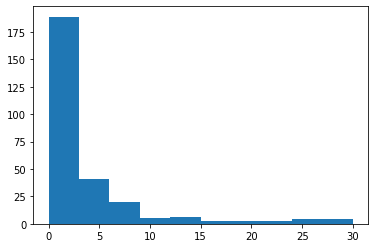

In [20]:
plt.hist(labels.values(), range=(0, 30))

(array([29., 13.,  4.,  1.,  0.,  1.,  0.,  1.,  0.,  0.]),
 array([  30.,  327.,  624.,  921., 1218., 1515., 1812., 2109., 2406.,
        2703., 3000.]),
 <a list of 10 Patch objects>)

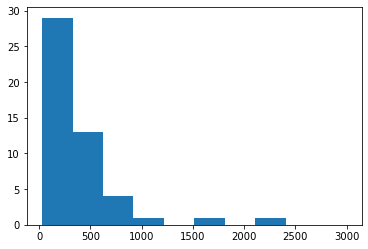

In [21]:
plt.hist(labels.values(), range=(30, 3000))

In [22]:
classes = [key for key, value in labels.items() if value >= QuestionsLabelExtractionTask.NOT_FREQ_LABEL_THRESH]
classes = list(set(classes))

In [23]:
len(classes)

62

In [24]:
labels

{'name': 6034,
 'background': 4890,
 'birth_name': 3145,
 'birth_date': 5017,
 'birth_place': 4007,
 'instrument': 4147,
 'genre': 4993,
 'occupation': 4814,
 'years_active': 4111,
 'associated_acts': 4452,
 'image': 3933,
 'native_name': 531,
 'native_name_lang': 307,
 'label': 3127,
 'website': 2179,
 'image_size': 643,
 'landscape': 399,
 'origin': 1633,
 'caption': 3436,
 'alias': 1028,
 'cover': 407,
 'type': 450,
 'artist': 515,
 'EP': 4,
 'released': 513,
 'format': 122,
 'studio': 183,
 'length': 482,
 'writer': 194,
 'producer': 454,
 'chronology': 48,
 'prev_title': 386,
 'prev_year': 386,
 'next_title': 405,
 'next_year': 405,
 'misc': 281,
 'alma_mater': 71,
 'module': 632,
 'children': 179,
 'spouse': 219,
 'module2': 93,
 'death_date': 819,
 'signature': 76,
 'Instruments': 13,
 'Labels': 5,
 'death_place': 678,
 'recorded': 470,
 'Associated_acts': 21,
 'nationality': 112,
 'album': 179,
 'B-side': 70,
 'alt': 188,
 'other_names': 77,
 'height': 77,
 'hair_color': 3,
 'e

In [25]:
len(list(labels.keys()))

338

In [27]:
label_count = len(classes)
num_pages = len(df)

In [28]:
label_count, num_pages

(62, 6221)

In [29]:
label_to_index = {}
index_to_label = {}
for i in range(label_count):
    label_to_index[classes[i]] = i
    index_to_label[i] = classes[i]

In [30]:
pij = np.zeros((label_count, label_count))
for lst in df.label.tolist():
    for o1 in lst:
        if not o1 in classes:
            continue
        for o2 in lst:
            if not o2 in classes:
                continue
            pij[label_to_index[o1], label_to_index[o2]] += 1/num_pages

In [31]:
classes

['native_name',
 'instruments',
 'prev_title',
 'artist',
 'spouse',
 'image',
 'next_year',
 'album',
 'label',
 'website',
 'next_title',
 'honorific_suffix',
 'length',
 'height',
 'cover',
 'studio',
 'image_size',
 'background',
 'years_active',
 'signature',
 'birth_name',
 'module',
 'origin',
 'birth_place',
 'name',
 'chronology',
 'current_members',
 'released',
 'associated_acts',
 'format',
 'nationality',
 'native_name_lang',
 'genre',
 'alt',
 'other_names',
 'alias',
 'death_date',
 'past_members',
 'birth_date',
 'writer',
 'caption',
 'prev_year',
 'module2',
 'recorded',
 'partner',
 'awards',
 'occupation',
 'Name',
 'landscape',
 'alma_mater',
 'death_place',
 'B-side',
 'type',
 'agent',
 'instrument',
 'border',
 'relatives',
 'misc',
 'children',
 'residence',
 'education',
 'producer']

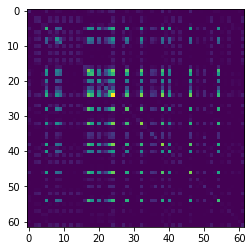

In [33]:
plt.imshow(pij)

In [50]:
E = np.zeros((label_count, label_count))
for i in range(label_count):
    for j in range(label_count):
        E[i, j] = np.log(pij[i,j] / (pij[i, i] * pij[j, j]))
E_filled = np.nan_to_num(E, nan=0, neginf=-5)

C:\Users\Aviv\Anaconda3\envs\research_env\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [51]:
E_filled

array([[ 2.46092392e+00, -5.00000000e+00, -5.00000000e+00, ...,
         1.92240382e-01,  1.92306963e+00, -5.00000000e+00],
       [-5.00000000e+00,  4.82366294e+00, -5.00000000e+00, ...,
        -5.00000000e+00, -4.65079822e-03, -5.00000000e+00],
       [-5.00000000e+00, -5.00000000e+00,  2.77984858e+00, ...,
        -5.00000000e+00, -5.00000000e+00,  2.44864876e+00],
       ...,
       [ 1.92240382e-01, -5.00000000e+00, -5.00000000e+00, ...,
         4.67524293e+00,  2.48598653e+00, -5.00000000e+00],
       [ 1.92306963e+00, -4.65079822e-03, -5.00000000e+00, ...,
         2.48598653e+00,  3.90737221e+00, -5.00000000e+00],
       [-5.00000000e+00, -5.00000000e+00,  2.44864876e+00, ...,
        -5.00000000e+00, -5.00000000e+00,  2.61758875e+00]])

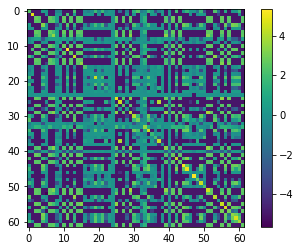

In [52]:
plt.imshow(E_filled)
plt.colorbar()

In [48]:
import networkx as nx

In [53]:
from community import best_partition

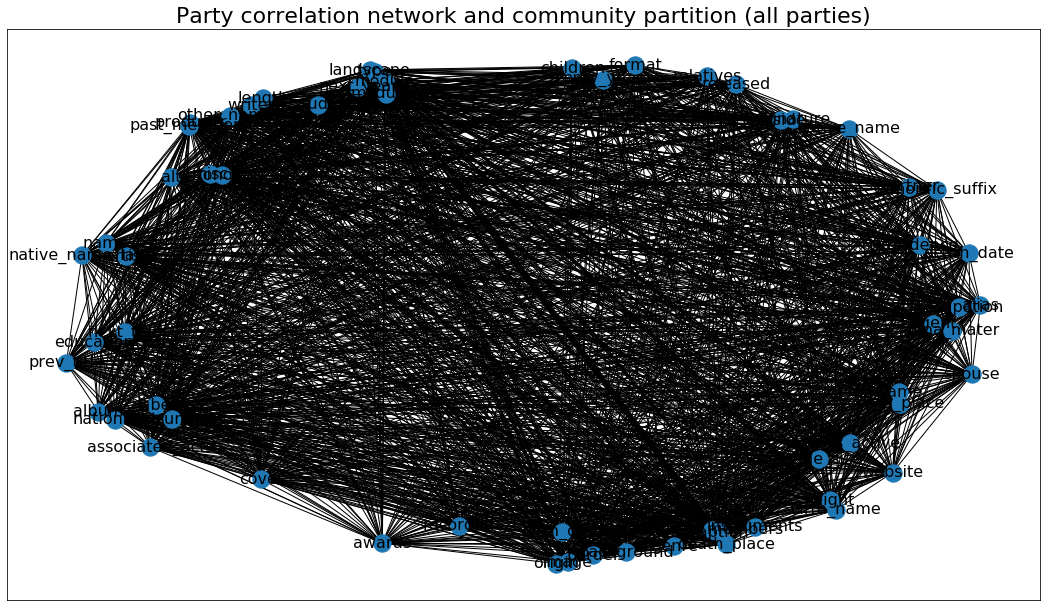

In [56]:
G=nx.Graph(E_filled)
G=nx.relabel_nodes(G, dict(zip(G.nodes(), classes)))
#communities=best_partition(G)
#print(len(communities))
#community_colors={for }
#node_coloring=[community_colors[communities[node]] for node in G.nodes()]

nx.pos=nx.fruchterman_reingold_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=5000, weight='weight', scale=1.0, center=None)

nx.draw_networkx(G, cmap=plt.get_cmap('jet'), with_labels=True, font_size=16)
plt.title('Party correlation network and community partition (all parties)', fontsize=22)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)